In [37]:
from PIL import Image
import os, glob
import matplotlib.pyplot as plt

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 1. make a function for image resizing (preprocessing)

In [38]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

599  images to be resized.
599  images resized.
가위 이미지 resize 완료!


Also resize images of rocks, and papers

In [39]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path2)

print("바위 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")

599  images to be resized.
599  images resized.
바위 이미지 resize 완료!
599  images to be resized.
599  images resized.
보 이미지 resize 완료!


In [40]:
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"



# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path3)
print("보 이미지 resize 완료!")

599  images to be resized.
599  images resized.
보 이미지 resize 완료!


1) make a tensor which consists of zero, and it is the 'white space' that image and label data will written
2) scissor, rock, paper corresponds to 0, 1 ,2 each in label data.

In [45]:
import numpy as np

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,1797)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1797 입니다.
x_train shape: (1797, 28, 28, 3)
y_train shape: (1797,)


### Make a sequntial model( neural network)

In [ ]:


import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

# MAX = np.max(x_train)
# MIN = np.min(x_train)
# x_train_norm = (x_train - MIN)/(MAX-MIN)
# print(np.max(x_train_norm), np.min(x_train_norm))
x_train_norm = x_train/255

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
print(x_train_norm.shape)



### Compiling, and fitting(learning)

In [49]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])
model.fit(x_train_norm, y_train, epochs=25)

Epoch 1/25
57/57 [==============================] - 2s 34ms/step - loss: 1.0594 - accuracy: 0.4465
Epoch 2/25
57/57 [==============================] - 0s 3ms/step - loss: 0.8144 - accuracy: 0.6440
Epoch 3/25
57/57 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.8323
Epoch 4/25
57/57 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.8179
Epoch 5/25
57/57 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8504
Epoch 6/25
57/57 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.9080
Epoch 7/25
57/57 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9275
Epoch 8/25
57/57 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9341
Epoch 9/25
57/57 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.9611
Epoch 10/25
57/57 [==============================] - 0s 3ms/step - loss: 0.0816 - accuracy: 0.9861
Epoch 11/25
57/57 

### open a test dataset(also preprocess)

33  images to be resized.
33  images resized.
33  images to be resized.
33  images resized.
33  images to be resized.
33  images resized.
학습데이터(x_train)의 이미지 개수는 99 입니다.
1.0


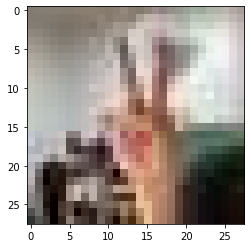

In [50]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]


image_dir_path_1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/rock"
image_dir_path_2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/scissor"
image_dir_path_3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test/paper"
resize_images(image_dir_path_1)
resize_images(image_dir_path_2)
resize_images(image_dir_path_3) 

image_dir_path_ = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test"

(x_test, y_test)=load_data(image_dir_path_,number_of_data=99)

x_test_norm = x_test/255
print(np.max(x_test_norm))

plt.imshow(x_test_norm[0])

### Evaluate the model

In [51]:
results = model.evaluate(x_test_norm, y_test, batch_size=20)
print("test loss, test acc:", results)

5/5 [==============================] - 0s 2ms/step - loss: 1.3573 - accuracy: 0.6364
test loss, test acc: [1.3573217391967773, 0.6363636255264282]


### Accuracy measured with about 64%.